# Figure 1b. Number of detectable and mappable xQTL loci in single−context fine−mapping
The x axis represents the number of detectable or mappable xQTL loci, the y axis represents the context

## detectable xQTL loci in single-context fine-mapping

In [4]:
# Install required packages
install.packages(c("data.table", "dplyr", "ggplot2"))
library(data.table)
library(dplyr)
library(ggplot2)
single_context_detectable_events_summary <- readRDS("~/project/Figure_codes/data/Figure_1b_ii_1.rds")
### define category color"
color_palette <- c("1" = "#3578A3", "2" = "#4B8F78", "3" = "#EA5E2C", "4" = "#CDBA2E", "5" = "#E69933", "6" = "#592357")


The downloaded binary packages are in
	/var/folders/vt/_frn4tt55gg3k2w_vb918mrh0000gn/T//RtmpNmN5Qu/downloaded_packages


Warning message in gzfile(file, "rb"):
“cannot open compressed file '/Users/shaoyuekun/project/Figure_codes/data/Figure_1b_ii_1.rds', probable reason 'No such file or directory'”


ERROR: Error in gzfile(file, "rb"): cannot open the connection


In [3]:
head(top_loci_meta_file)

#chr,start,end,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP,conditional_effect,resource,pip_sum,event_ID_n_detectable,event_ID_detectable_variant_count,event_ID_n_mappable
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,903284,903285,C,T,chr1:903285:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903351,903352,A,G,chr1:903352:G:A,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903509,903510,G,A,chr1:903510:A:G,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,903535,903536,T,A,chr1:903536:A:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904080,904081,C,T,chr1:904081:T:C,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0
1,904114,904115,T,G,chr1:904115:G:T,ENSG00000235169,Knight_eQTL_brain_ENSG00000235169,0,0,0,0.04257485,-0.8420827,Knight_eQTL_brain,0.3405988,0,8,0


In [3]:
#color_palette <- brewer.pal(6, "Set2")

# First: calculate total counts per resource
total_counts <-  single_context_detectable_events_summary%>%
  group_by(resource) %>%
  summarise(total_log_count = sum(log_gene_count), .groups = "drop")

# Identify metabrain contexts
metabrain_contexts <- grep("Metabrain", total_counts$resource, value = TRUE)

# Reorder factor levels: non-metabrain (descending), then metabrain (descending)
non_meta <- total_counts %>%
  filter(!resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

meta <- total_counts %>%
  filter(resource %in% metabrain_contexts) %>%
  arrange(desc(total_log_count)) %>%
  pull(resource)

ordered_resources <- factor(c(non_meta, meta), levels = c(non_meta, meta))

# Apply the order to your main data
single_context_detectable_events_summary$resource <- factor(single_context_detectable_events_summary$resource, levels = rev(levels(ordered_resources)))

#pdf("single_context_stacked_plot_detectable.pdf", width =10, height = 10)
# Create stacked bar plot
p1 <- ggplot(single_context_detectable_events_summary, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

ERROR: Error: object 'single_context_detectable_events_summary' not found


In [4]:
options(repr.plot.width = 18, repr.plot.height = 14)
p1

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (1417275621.py, line 1)

## mappable xQTL loci in single-context fine-mapping

In [10]:
#install packages 

#install.packages(c("ggplot2", "dplyr", "scales"))
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


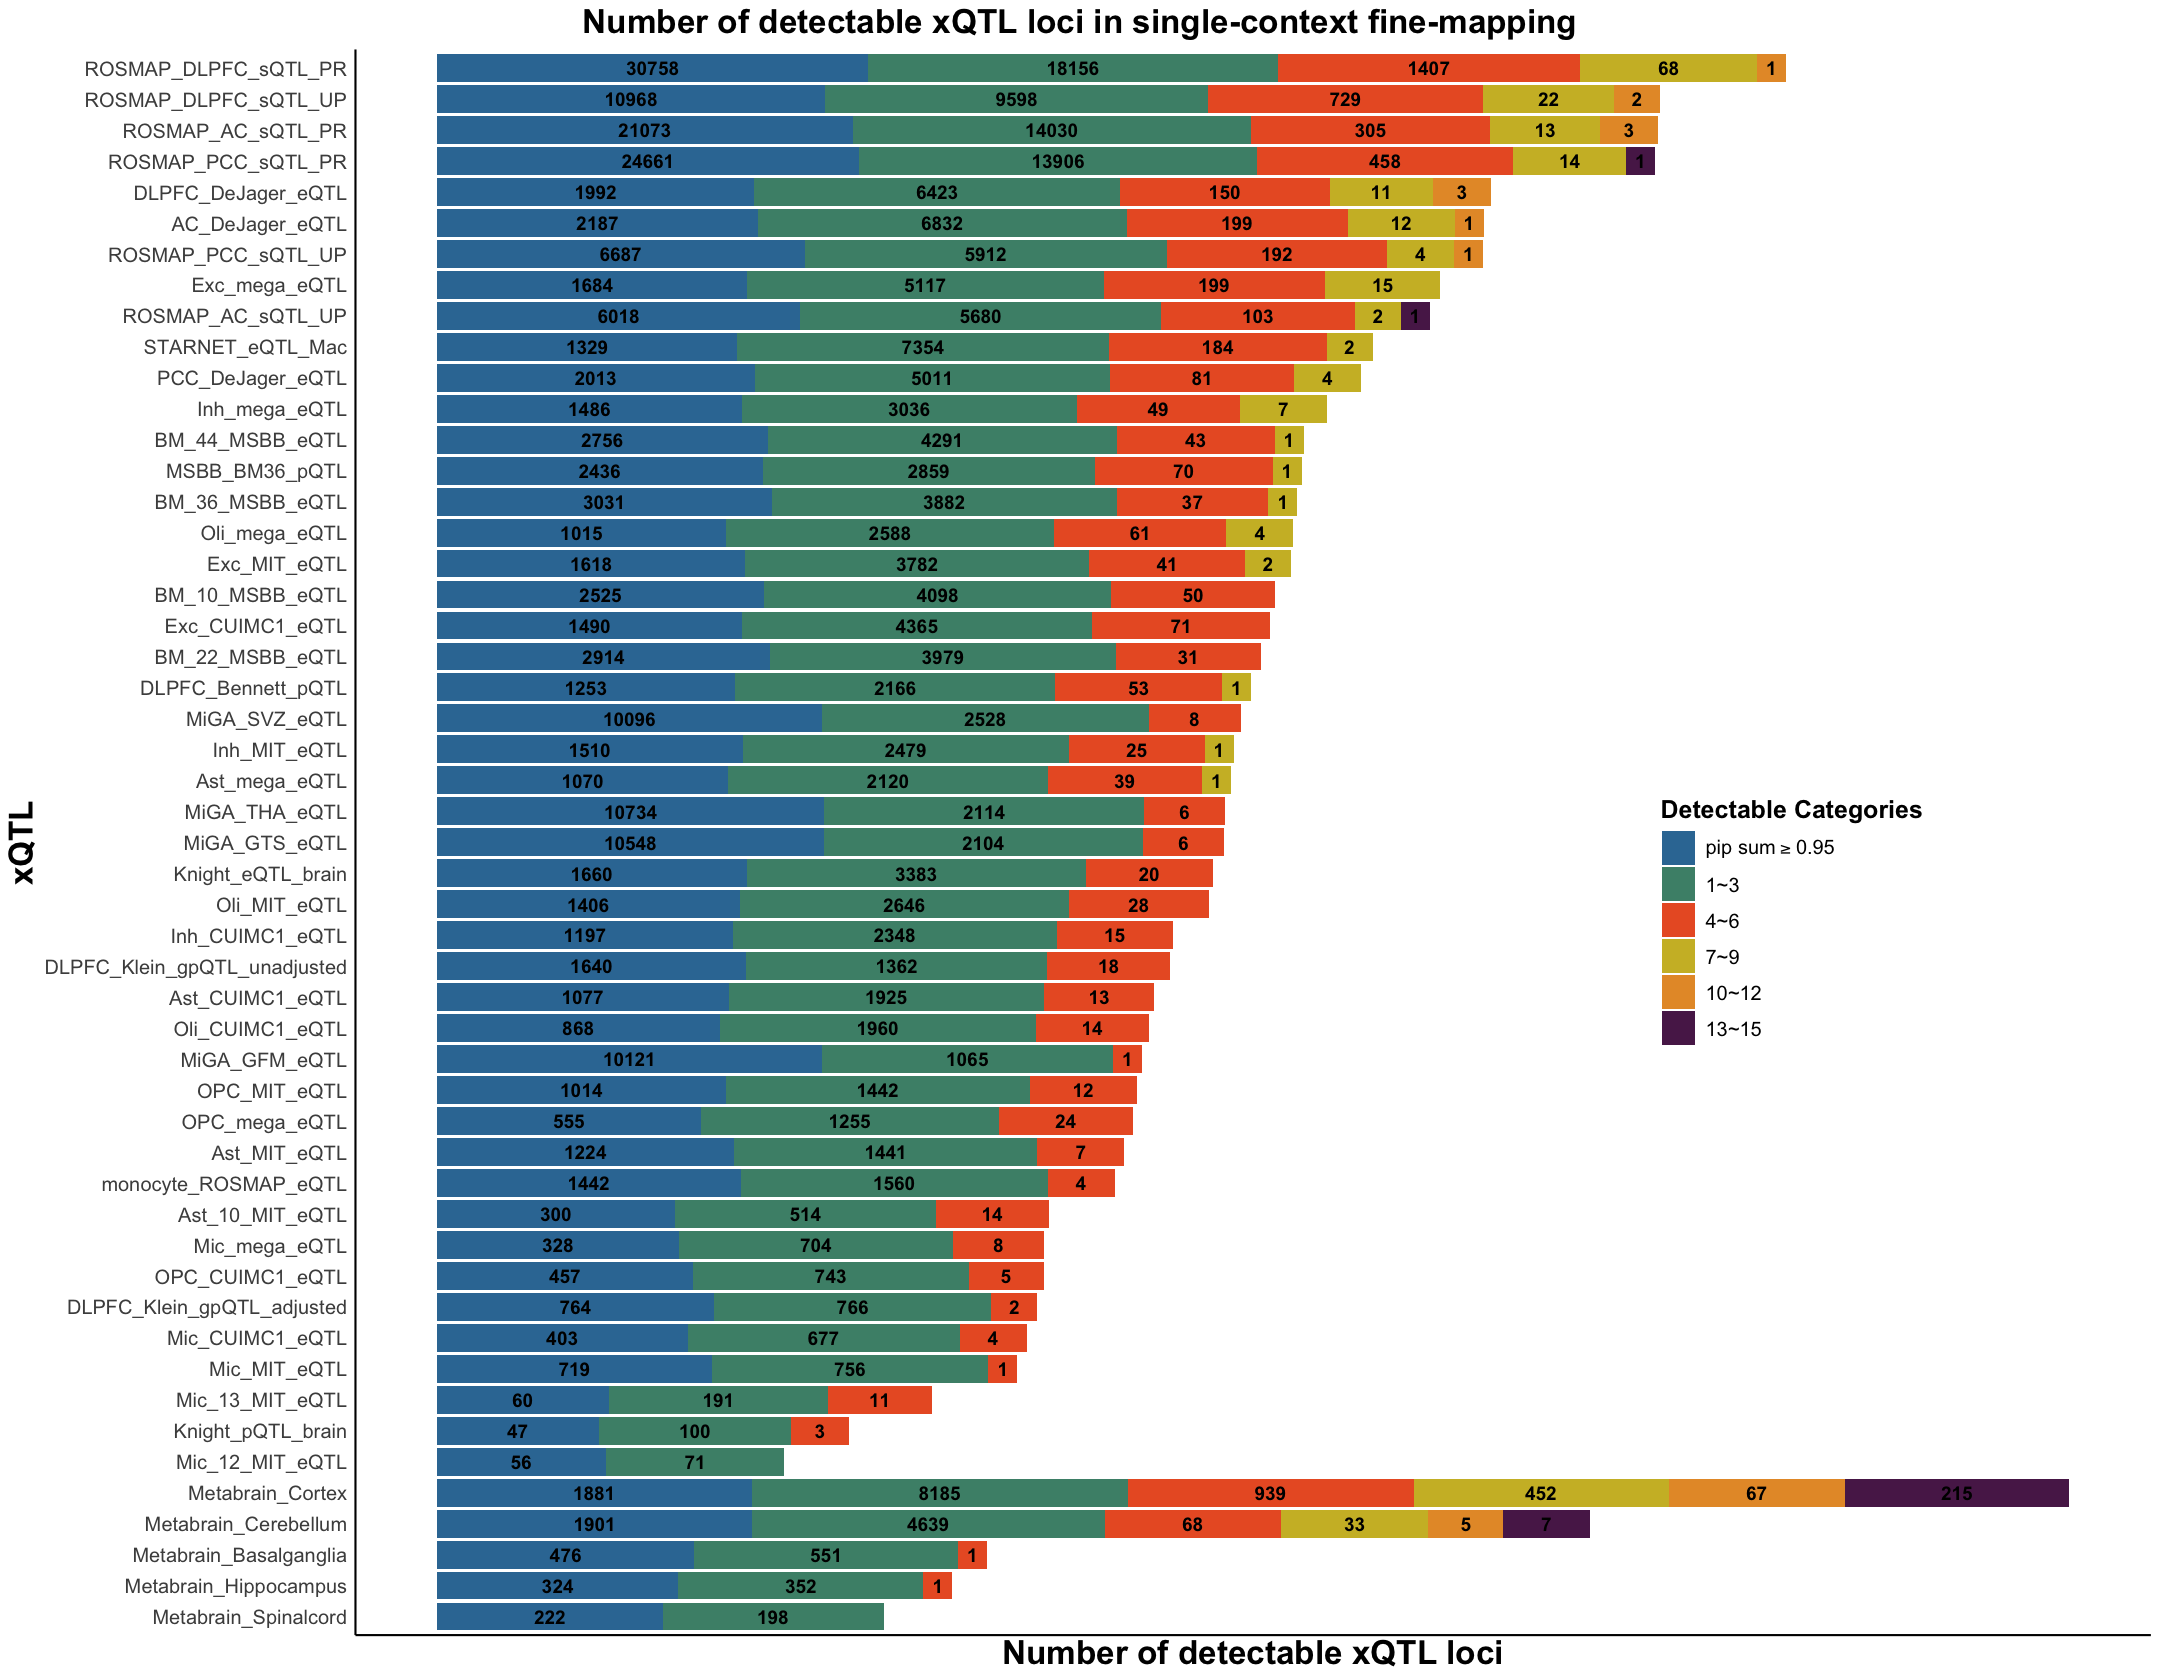

In [12]:
 ## Hillary Edit

#load data from my local 
figure_1b_data_2 <- readRDS("/Users/shaoyuekun/Desktop/Dr.Wang/Figure_1b_num_xQTL_loci_single_context_2.rds")
options(repr.plot.width = 18, repr.plot.height = 14)

#rename variables: if OPC, Mic, Inh, Ast, Oli, Exc in the name, change Kellis -> MIT and DeJager -> CUIMC1

#original figure 1b_p1 with renamed variables
p1 <- ggplot(figure_1b_data_2$detectable_data, aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  geom_bar(stat = "identity", position = "stack") +
  geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = figure_1b_data_2$color_palette, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),
                    guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of detectable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of detectable xQTL loci") +
  coord_flip() +
  # Use scale_x_discrete instead of scale_y_discrete (because of coord_flip)
  scale_x_discrete(labels = function(x) {
    sapply(x, function(name) {
      if(grepl("OPC|Mic|Inh|Ast|Oli|Exc", name)) {
        name <- gsub("Kellis", "MIT", name)
        name <- gsub("DeJager", "CUIMC1", name)
      }
      return(name)
    }, USE.NAMES = FALSE)
  }) +
  theme_minimal() +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        plot.title.position = "plot",
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 20, face = "bold"),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 15, face = "bold"),
        legend.position = c(0.8, 0.45),
        panel.grid = element_blank(),
        panel.background = element_rect(fill = "white", colour = NA),
        plot.background = element_rect(fill = "white", colour = NA),
        axis.line = element_line(color = "black", size = 0.6),
        legend.key.size = unit(1.5, "lines"),
        legend.key.height = unit(1.5, "lines"),
        legend.key.width = unit(1.5, "lines"))

print(p1)




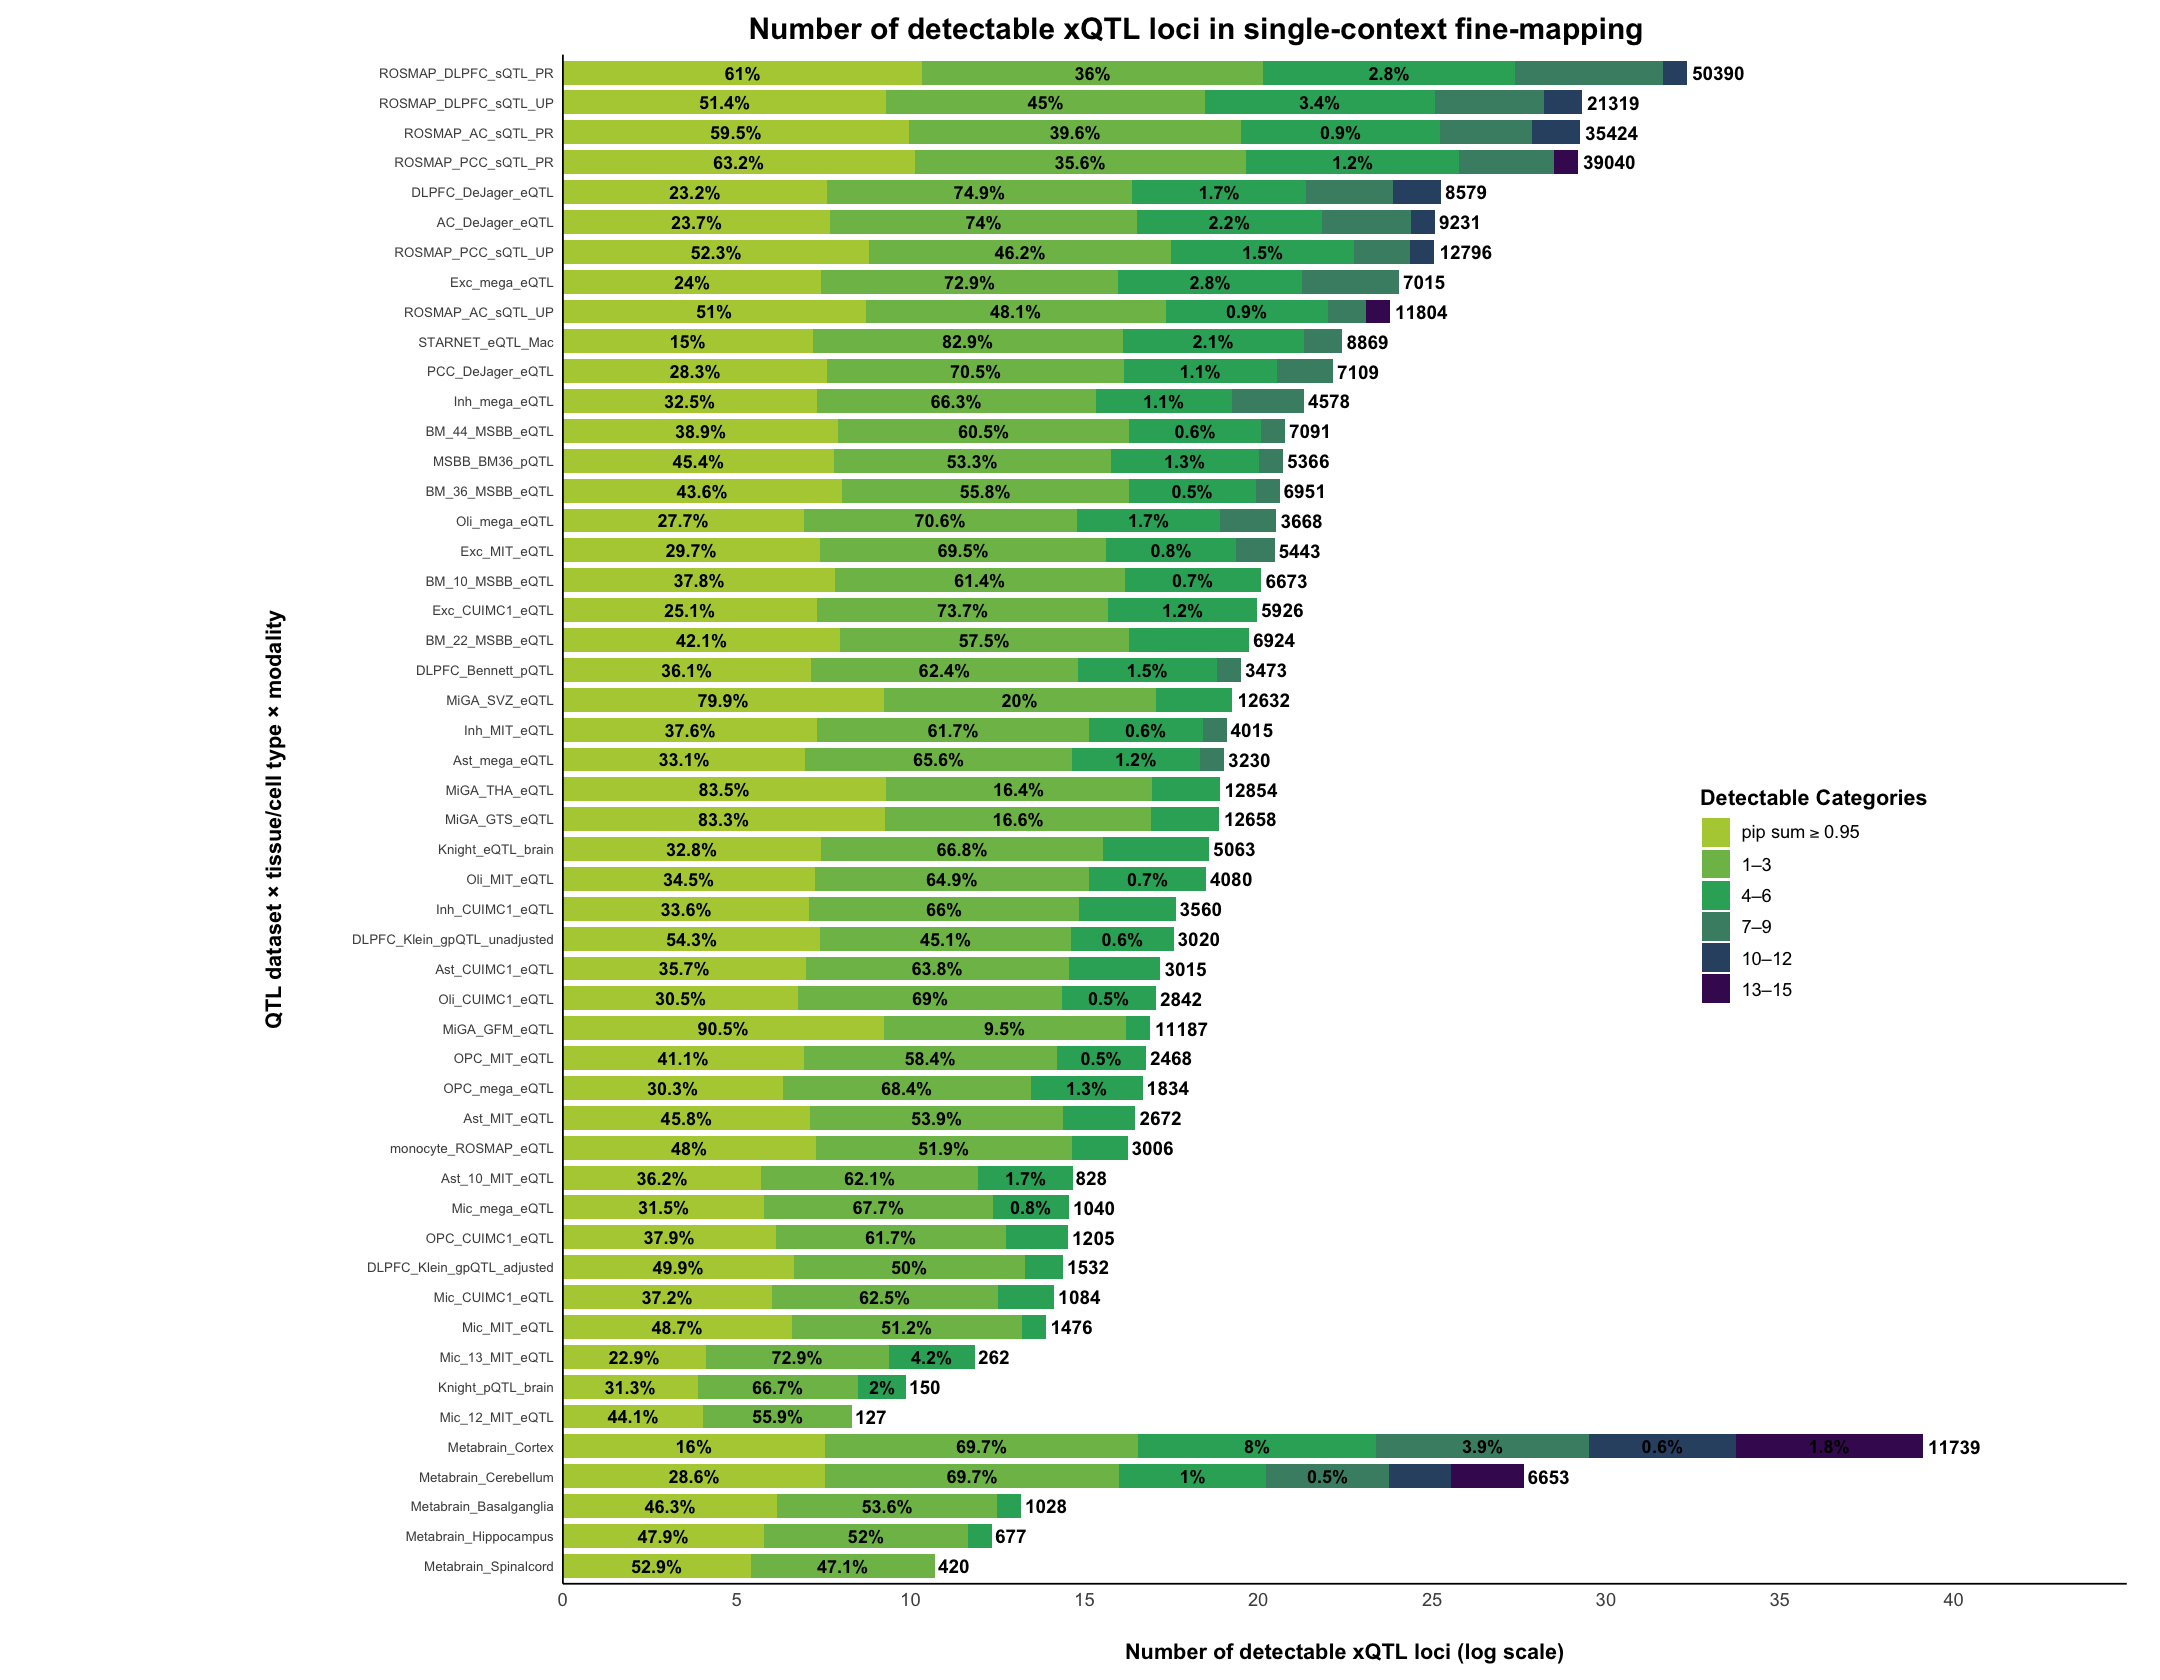

In [34]:
# figure 1b_p1 plot showing percentage distribution of detectable categories across datasets with total counts per resource (with renamed variables)
# added: 1. percentage of each segment 2. total count appears at end of each bar 3. log scale of number of detactable xQTL loci on x-axis

# Calculate percentages for each segment and total counts for each resource
figure_1b_data_2$detectable_data <- figure_1b_data_2$detectable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

figure_1b_data_2$color_palette_new <- c("#451460","#335172","#478d73","#2eac66", "#7ebc57", "#b3cd41")

p1 <- ggplot(figure_1b_data_2$detectable_data,
             aes(x = resource, y = log_gene_count, fill = n_detectable_category)) +
  
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.8, fontface = "bold", lineheight = 0.9) +
  
  geom_text(data = function(x) x %>% group_by(resource) %>% summarise(total_count = first(total_count), 
                                                                      log_gene_count = sum(log_gene_count),
                                                                      .groups = 'drop'),
            aes(x = resource, y = log_gene_count, label = total_count),
            hjust = -0.1, vjust = 0.5,
            color = "black", size = 4, fontface = "bold", inherit.aes = FALSE) +
  
  scale_fill_manual(values = figure_1b_data_2$color_palette_new, 
                    name = "Detectable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  scale_x_discrete(labels = function(x) {
    sapply(x, function(name) {
      if(grepl("OPC|Mic|Inh|Ast|Oli|Exc", name)) {
        name <- gsub("Kellis", "MIT", name)
        name <- gsub("DeJager", "CUIMC1", name)
      }
      return(name)
    }, USE.NAMES = FALSE)
  }) +
  
  labs(
    title = "Number of detectable xQTL loci in single-context fine-mapping",
    x = "QTL dataset × tissue/cell type × modality",   
    y = "Number of detectable xQTL loci (log scale)"   
  ) +
  
  coord_flip(clip = "off") +
  
  scale_y_continuous(breaks = scales::pretty_breaks(n = 8),
                     labels = scales::comma,
                     expand = expansion(mult = c(0, 0.15))) + 
  
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),   
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 11),
    axis.text.y = element_text(size = 8),
    
    axis.title.x = element_text(size = 13, face = "bold", margin = margin(t = 20)), 
    axis.title.y = element_text(size = 13, face = "bold",
                                margin = margin(r = 40)),               
    
    legend.text = element_text(size = 11),
    legend.title = element_text(size = 13, face = "bold"),
    legend.position = c(0.8, 0.45),
    
    panel.grid = element_blank(),        
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    axis.line = element_line(color = "black", linewidth = 0.5),
    
    legend.key.size = unit(1.3, "lines"),                              
    legend.key.height = unit(1.3, "lines"),
    legend.key.width = unit(1.3, "lines"),
    
    plot.margin = margin(10, 20, 10, 160)
  )

#dev.off()
print(p1)



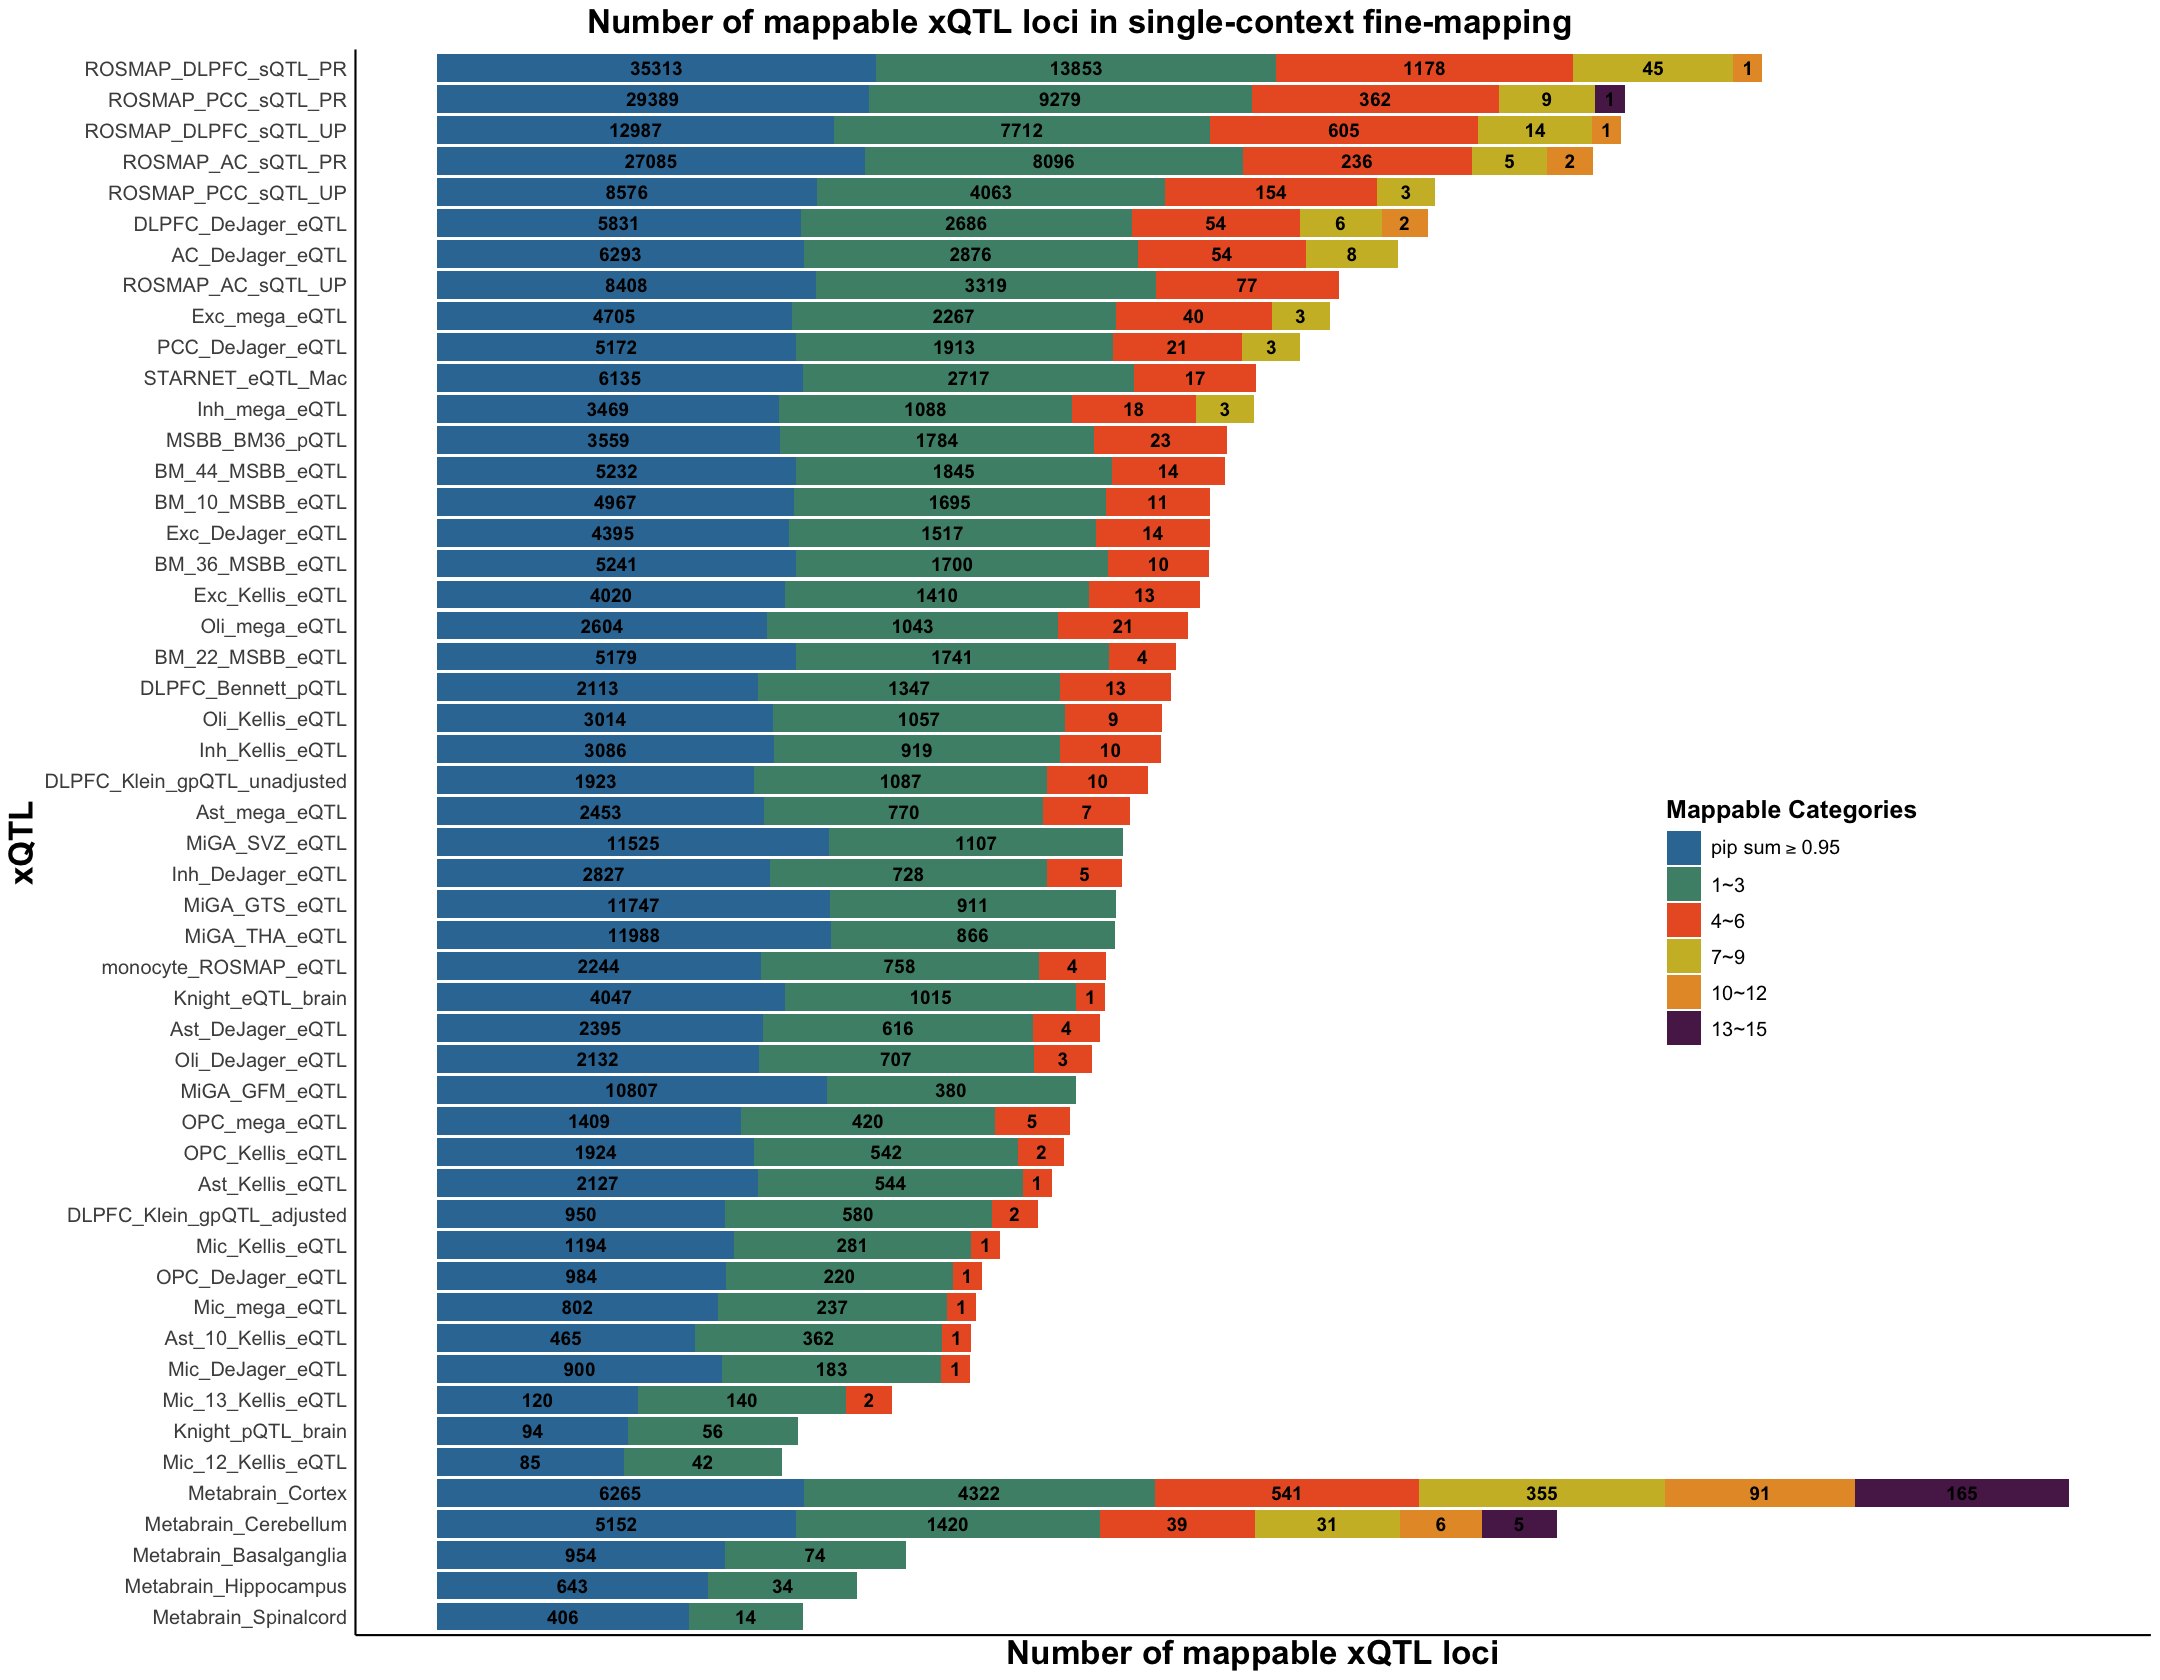

In [29]:

#original figure 1b_p2 with renamed variables

p2<- ggplot(figure_1b_data_2$mappable_data, aes(x = resource, y = log_gene_count, fill = n_mappable_category)) +
  geom_bar(stat = "identity", position = "stack") +  # Stacked bars
 geom_text(aes(label = gene_count), position = position_stack(vjust = 0.5), color = "black", size = 4, fontface = "bold") +
  scale_fill_manual(values = figure_1b_data_2$color_palette, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95),"1~3", "4~6", "7~9", "10~12","13~15")),guide = guide_legend(reverse = TRUE)) + 
  labs(title = "Number of mappable xQTL loci in single-context fine-mapping",
       x = "xQTL",
       y = "Number of mappable xQTL loci") +
  coord_flip() +
  theme_minimal() +
  theme(plot.title  = element_text(size = 20, face = "bold", hjust = 0.5),
       # aspect.ratio = 1/3,
    plot.title.position = "plot",
    axis.text.x = element_blank(),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 15, face = "bold"),
    legend.position = c(0.8, 0.45),
    #plot.margin = margin(10, 10, 10, 80),
    panel.grid   = element_blank(),        # removes both x and y grid lines
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background  = element_rect(fill = "white", colour = NA),
    axis.line = element_line(color = "black", size = 0.6),
      legend.key.size = unit(1.5, "lines"),
      legend.key.height = unit(1.5, "lines"),
  legend.key.width  = unit(1.5, "lines")
)
#dev.off()

print(p2)

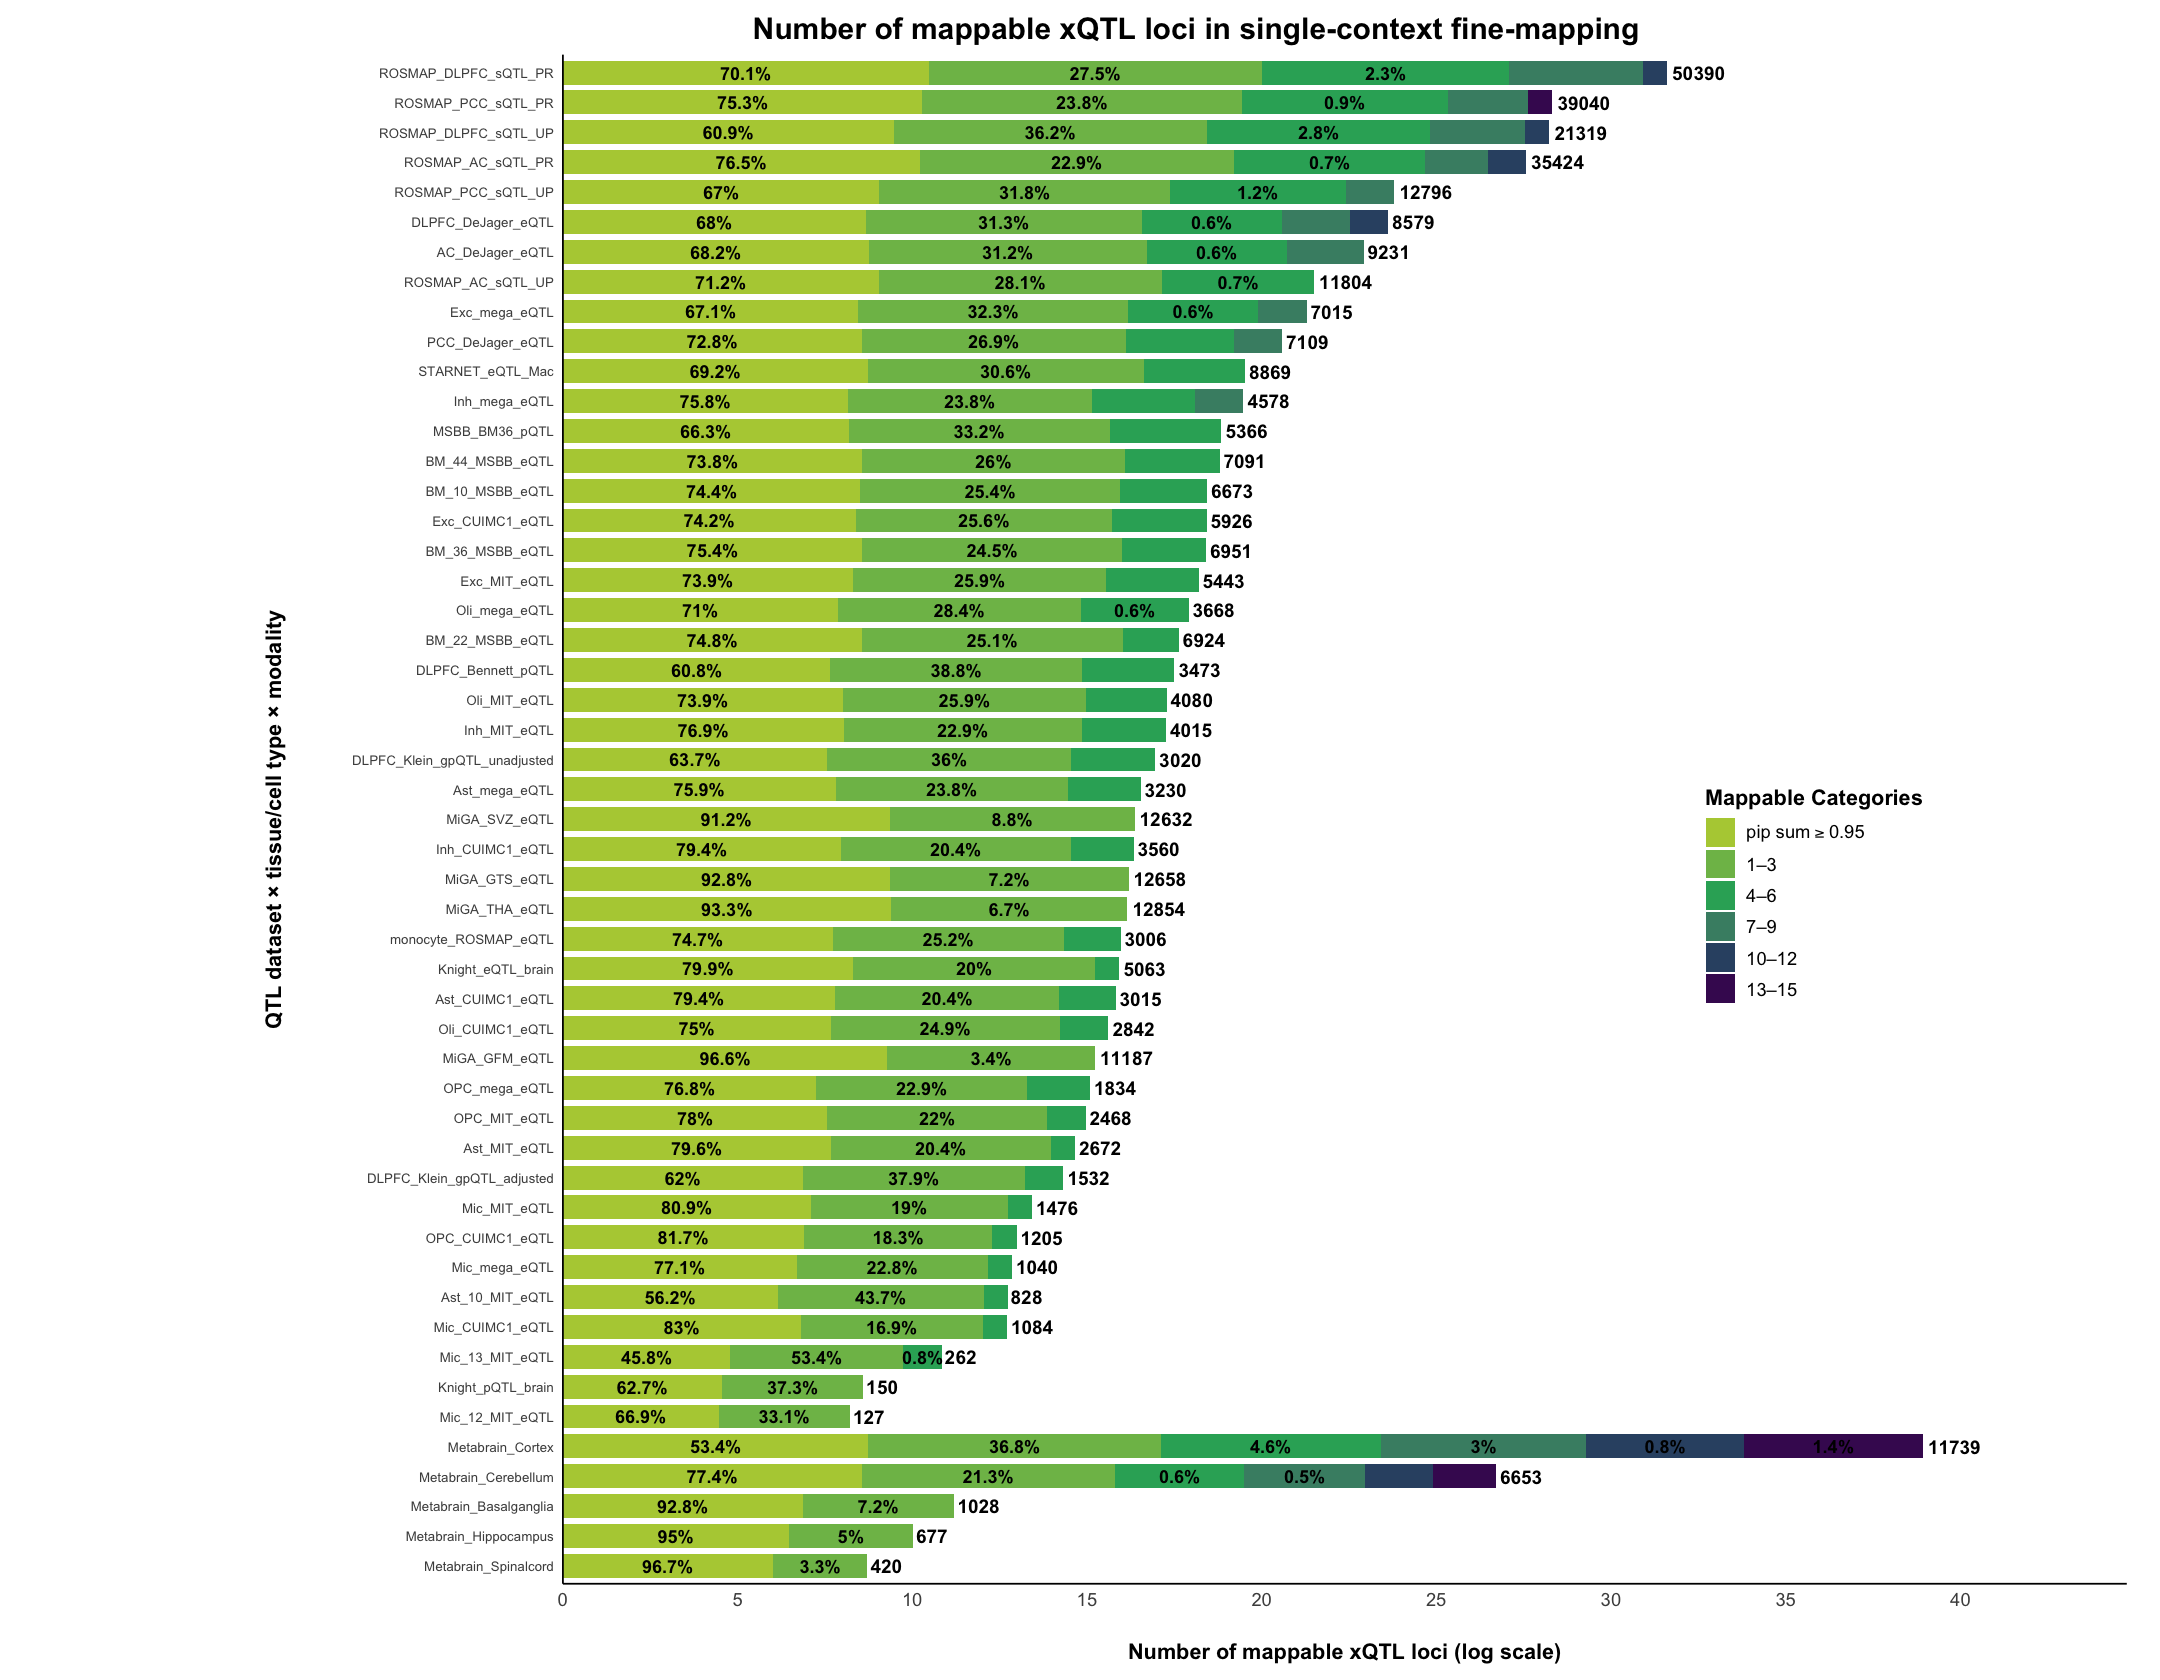

In [33]:
# original figure1b_p2 plot plot showing percentage distribution of detectable categories across datasets with total counts per resource (with renamed variables)

# Calculate percentages for each segment and total counts for each resource (for mappable data)
figure_1b_data_2$mappable_data <- figure_1b_data_2$mappable_data %>%
  group_by(resource) %>%
  mutate(
    total_count = sum(gene_count),
    percentage = round((gene_count / total_count) * 100, 1)
  ) %>%
  ungroup()

p2 <- ggplot(figure_1b_data_2$mappable_data,
             aes(x = resource, y = log_gene_count, fill = n_mappable_category)) +
  # CHANGED: set bar width a touch slimmer for dense categories
  # WHY: improves legibility when many rows (as in your reference figures)
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  
  # CHANGED: Show percentages instead of raw counts in segments
  # WHY: provides better understanding of proportions within each dataset
  geom_text(aes(label = ifelse(gene_count > 0 & percentage >= 0.5, paste0(percentage, "%"), "")),
            position = position_stack(vjust = 0.5),
            color = "black", size = 3.8, fontface = "bold", lineheight = 0.9) +
  
  # NEW: Add total counts at the end of each bar (only once per resource)
  # WHY: shows absolute numbers while maintaining percentage view in segments
  geom_text(data = function(x) x %>% group_by(resource) %>% summarise(total_count = first(total_count), 
                                                                      log_gene_count = sum(log_gene_count),
                                                                      .groups = 'drop'),
            aes(x = resource, y = log_gene_count, label = total_count),
            hjust = -0.1, vjust = 0.5,
            color = "black", size = 4, fontface = "bold", inherit.aes = FALSE) +
  
  # CHANGED: tighten legend typography & cleaner labels (en-dash)
  # WHY: matches journal aesthetics; reverse keeps darkest category at bottom of key
  scale_fill_manual(values = figure_1b_data_2$color_palette_new, 
                    name = "Mappable Categories", 
                    labels = rev(c(expression("pip sum" >= 0.95), "1–3", "4–6", "7–9", "10–12", "13–15")),
                    guide = guide_legend(reverse = TRUE)) + 
  
  # NEW: Add renaming for axis labels only (keeps original data intact)
  scale_x_discrete(labels = function(x) {
    sapply(x, function(name) {
      if(grepl("OPC|Mic|Inh|Ast|Oli|Exc", name)) {
        name <- gsub("Kellis", "MIT", name)
        name <- gsub("DeJager", "CUIMC1", name)
      }
      return(name)
    }, USE.NAMES = FALSE)
  }) +
  
  # CHANGED: clarify x label to indicate these are contexts
  # WHY: mirrors the panel titles in your reference figures
  labs(
    title = "Number of mappable xQTL loci in single-context fine-mapping",
    x = "QTL dataset × tissue/cell type × modality",   # CHANGED
    y = "Number of mappable xQTL loci (log scale)"     # CHANGED
  ) +
  
  # CHANGED: allow slight overhang for labels; prevents clipping on edges
  # WHY: safer when stacked labels sit near plot bounds
  coord_flip(clip = "off") +
  
  # CHANGED: show tidy, widely spaced ticks with comma formatting + extra right padding for totals
  # WHY: fixes the "bottom x-axis numbers sticking together" after flip + space for total counts
  scale_y_continuous(breaks = scales::pretty_breaks(n = 8),
                     labels = scales::comma,
                     expand = expansion(mult = c(0, 0.15))) +  # Increased right margin for totals
  
  # CHANGED: small base size bump for a cleaner minimal theme
  # WHY: more readable without looking heavy
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),   # CHANGED: smaller title
    plot.title.position = "plot",
    
    axis.text.x = element_text(size = 11),
    axis.text.y = element_text(size = 8),
    
    axis.title.x = element_text(size = 13, face = "bold", margin = margin(t = 20)), 
    axis.title.y = element_text(size = 13, face = "bold",
                                margin = margin(r = 40)),               
    
    legend.text = element_text(size = 11),
    legend.title = element_text(size = 13, face = "bold"),
    legend.position = c(0.8, 0.45),
    
    panel.grid = element_blank(),        # keeps your clean look (no grids)
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    
    # CHANGED: thinner axis line for a lighter feel (journal style)
    axis.line = element_line(color = "black", linewidth = 0.5),
    
    legend.key.size = unit(1.3, "lines"),                               # CHANGED: slightly leaner keys
    legend.key.height = unit(1.3, "lines"),
    legend.key.width = unit(1.3, "lines"),
    
    # CHANGED: add left margin to prevent long y labels from clipping
    # WHY: mirrors the generous gutters in your example figures
    plot.margin = margin(10, 20, 10, 160)
  )

#dev.off()
print(p2)

